In [1]:
import pandas as pd
import settings
'''
Part 10

Plots of CARs based on return_result2.xlsx
'''
df= pd.read_excel(settings.csv_path+'/return_result2.xlsx', index_col=0)
df2=df.copy()


all (497, 67)
pos (248, 35)
neg (248, 35)


Text(0.5, 1.0, 'CARs since Covid by Tone')

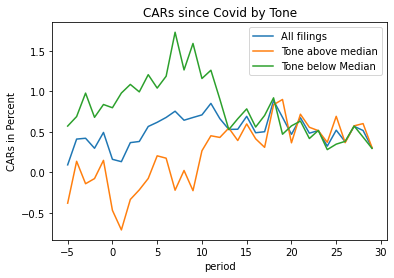

In [2]:
#Plot data since covid (two groups split at median)
df=df.loc[(df['reportDate'] > '2020-03-1')]
print('all',df.shape)
df_pos=df[(df['tone']>df['tone'].quantile(0.5))].loc[:,'CAR0':]
print('pos',df_pos.shape)

df_neg=df[(df['tone']<df['tone'].quantile(0.5))].loc[:,'CAR0':]
print('neg',df_neg.shape)

df= df.loc[:,'CAR0':]
frame = { 'All filings': df.mean()*100, 'Tone above median': df_pos.mean()*100 , 'Tone below Median': df_neg.mean()*100 }
  
df1 = pd.DataFrame(frame)
index= pd.Series(range(settings.event_start, settings.event_end-1))
df1.loc[:,'period'] = pd.Series(range(settings.event_start_extended, settings.event_end_extended-1), index=df1.index)
df1=df1.set_index('period')
#df1=df1.loc[-1:,:]
ax=df1.plot()
ax.set_ylabel("CARs in Percent")
ax.set_title("CARs since Covid by Tone")

all (3113, 67)
pos (1556, 35)
neg (1556, 35)
overall CAR in period 30: 0.9833
pos Tone CAR in period 30: 1.3053
neg Tone CAR in period 30: 0.6679
div CAR in period 10 -0.5113
div CAR in period 11 -0.8757
div CAR in period 12 -0.9032
div CAR in period 13 -0.9931
div CAR in period 14 -0.6129
div CAR in period 15 -0.7689
div CAR in period 16 -0.7356
div CAR in period 17 -0.815
div CAR in period 18 -0.8022
div CAR in period 19 -0.8482
div CAR in period 20 -0.7243
div CAR in period 21 -0.6188
div CAR in period 22 -0.8186
div CAR in period 23 -0.9427
div CAR in period 24 -0.9471
div CAR in period 25 -0.8118
div CAR in period 26 -0.9241
div CAR in period 27 -0.7024
div CAR in period 28 -0.5712
div CAR in period 29 -0.6374


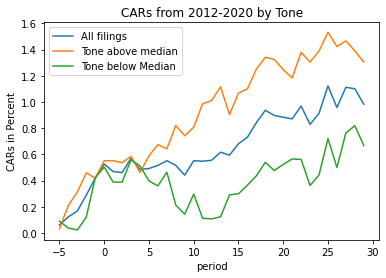

In [3]:
#Plot data from 2012-2020 Two groups: Top and bottom 50% quantiles

df=df2.loc[(df2['reportDate'] < '2020-03-1')& (df2['reportDate'] > '2012-01-1')]
print('all',df.shape)
df_pos=df[(df['tone']>df['tone'].quantile(0.5))].loc[:,'CAR0':]
print('pos',df_pos.shape)

df_neg=df[(df['tone']<df['tone'].quantile(0.5))].loc[:,'CAR0':]
print('neg',df_neg.shape)

df= df.loc[:,'CAR0':]
frame = { 'All filings': df.mean()*100, 'Tone above median': df_pos.mean()*100 , 'Tone below Median': df_neg.mean()*100 }
  
df1 = pd.DataFrame(frame)
df1.loc[:,'period'] = pd.Series(range(settings.event_start_extended, settings.event_end_extended-1), index=df1.index)
df1=df1.set_index('period')
ax=df1.plot()
ax.set_ylabel("CARs in Percent")
ax.set_title("CARs from 2012-2020 by Tone")
print('overall CAR in period 30:',round(df.mean()['CAR34']*100, 4))
print('pos Tone CAR in period 30:',round(df_pos.mean()['CAR34']*100, 4))
print('neg Tone CAR in period 30:',round(df_neg.mean()['CAR34']*100, 4))
for i in range(15,35):
    print('div CAR in period ' + str(i-5),round(df_neg.mean()['CAR'+str(i)]*100-df_pos.mean()['CAR'+str(i)]*100, 4))

all (3113, 67)
pos (1245, 35)
neg (1245, 35)


Text(0.5, 1.0, 'CARs from 2012-2020 by Tone')

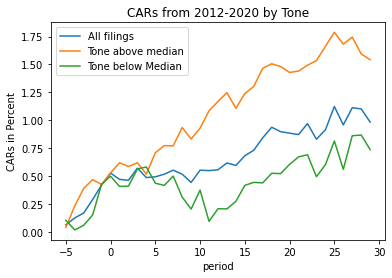

In [4]:
#Plot data from 2012-2020, Two groups: Top and bottom 40% quantiles

df=df2.loc[(df2['reportDate'] < '2020-03-1')& (df2['reportDate'] > '2012-01-1')]
print('all',df.shape)
df_pos=df[(df['tone']>df['tone'].quantile(0.6))].loc[:,'CAR0':]
print('pos',df_pos.shape)

df_neg=df[(df['tone']<df['tone'].quantile(0.4))].loc[:,'CAR0':]
print('neg',df_neg.shape)

df= df.loc[:,'CAR0':]
frame = { 'All filings': df.mean()*100, 'Tone above median': df_pos.mean()*100 , 'Tone below Median': df_neg.mean()*100 }
  
df1 = pd.DataFrame(frame)
df1.loc[:,'period'] = pd.Series(range(settings.event_start_extended, settings.event_end_extended-1), index=df1.index)
df1=df1.set_index('period')
ax=df1.plot()
ax.set_ylabel("CARs in Percent")
ax.set_title("CARs from 2012-2020 by Tone")
